<br />

<div style="text-align: center;">
<font size="7">Linear Interpolation</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">Taneaki Mori</font>
</div>

<br />

<br />

<div style="text-align: left;">
<font size="4">Linear Interpolation code: https://github.com/taneaki/Interpolations.jl/blob/master/lin_int.jl</font>
</div>

<br />

<br />

<div style="text-align: left;">
<font size="5">1.補完関数</font>
</div>

<br />

In [4]:
;type "lin_int.jl"

LoadError: LoadError: could not spawn `type lin_int.jl`: no such file or directory (ENOENT)
while loading In[4], in expression starting on line 1

In [5]:
include("lin_int.jl")

lin_int (generic function with 1 method)

In [6]:
grid =[1, 2, 3, 4, 5, 6, 7, 8]
vals = [2, 0, 4, -1, 3, 7, 3, 10]
f = lin_int(grid,vals)

f([0,1, 2.7, 7.5, 8.1])

5-element Array{Any,1}:
  "error"
 2.0     
 2.8     
 6.5     
  "error"

<br />

<div style="text-align: left;">
<font size="5">2.残差関数</font>
</div>

<br />

In [7]:
g(x) = 2 .* cos(6x) .+ sin(14x) .+ 2.5

g (generic function with 1 method)

<br />

<div style="text-align: left;">
<font size="4">線形補完の精度によって残差がどのように変化するかを見てみる。</font>
</div>

<br />

In [104]:
c_grid = 0:.25:1  #線形補完を0.25ごとにおこなう場合
Af1 = lin_int(c_grid, g(c_grid))  
d_grid = 0:.2:1  #線形補完を0.2ごとにおこなう場合
Af2 = lin_int(d_grid, g(d_grid))  
e_grid = 0:.1:1  #線形補完を0.1ごとにおこなう場合
Af3 = lin_int(e_grid, g(e_grid))  
residual1(x) = g(x) - Af1(x)  
residual2(x) = g(x) - Af2(x)  
residual3(x) = g(x) - Af3(x)  

residual3 (generic function with 1 method)

<br />

<div style="text-align: left;">
<font size="5">3.プロット</font>
</div>

<br />

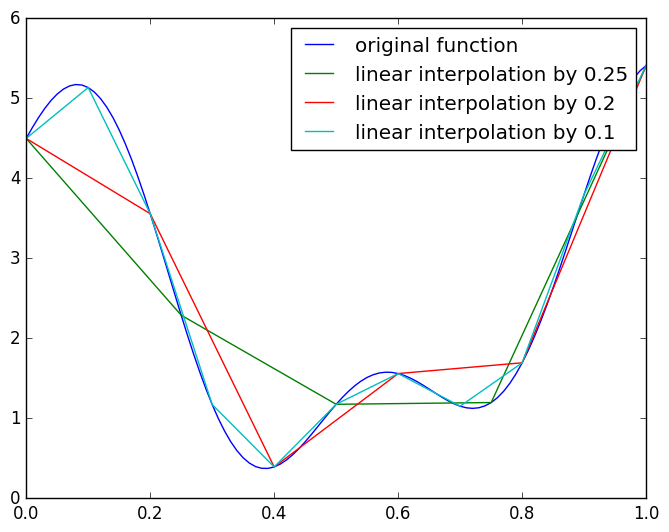

PyObject <matplotlib.legend.Legend object at 0x000000002149CD30>

In [114]:
using PyPlot
x = Array(Float64,101)
x =(0:100)/100
plot(x,g(x), label="original function")
plot(x,Af1(x), label="linear interpolation by 0.25")
plot(x,Af2(x), label="linear interpolation by 0.2")
plot(x,Af3(x), label="linear interpolation by 0.1")
legend()

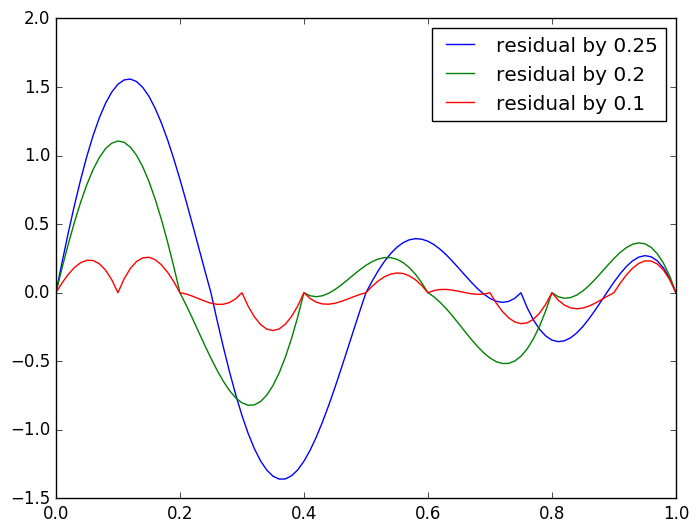

PyObject <matplotlib.legend.Legend object at 0x0000000001BA3E48>

In [103]:
using PyPlot
x = Array(Float64,101)
x =(0:100)/100
plot(x,residual1(x), label="residual by 0.25")
plot(x,residual2(x), label="residual by 0.2")
plot(x,residual3(x), label="residual by 0.1")
legend()